# Naive Bayes e Distribuições

# Bernoulli

É importante você entender os tipos de frequência para aplicar os tipos de algoritmos corretos, que são baseados nessa estrutura. 

In [1]:
# GaussianNB é o mais padrão - De uma distribuição normal gaussiana

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("census.csv")

In [6]:
# Vamos utilizar para os dados que tem distribuição 0 e 1.
# Nesse caso baseado no gênero vamos avaliar o income

In [7]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data['sex'].unique() # Os valores que vão retornar 

array([' Male', ' Female'], dtype=object)

In [10]:
X = data['sex'].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [11]:
# Transformando para dados discretos
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
X = label_encoder.fit_transform(X)

In [14]:
# Observando os valores já transformandos 
print(X)

[1 1 1 ... 0 1 0]


<AxesSubplot:>

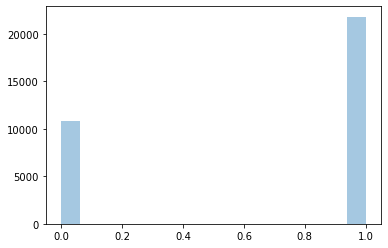

In [18]:
sns.distplot(X, kde=False) # Observando o tipo de distribuição bernoulli

In [20]:
X.shape # Tamanho

(32561,)

In [21]:
X = X.reshape(-1,1)
X.shape

(32561, 1)

In [22]:
y = data['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [23]:
# Criando modelo de machine learning
bernoulli_naive_bayes = BernoulliNB()

In [24]:
bernoulli_naive_bayes.fit(X,y)

BernoulliNB()

In [25]:
previsoes = bernoulli_naive_bayes.predict(X)

In [26]:
previsoes, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [31]:
# Calculando a acurácia do modelo, somente com o atributo gênero
accuracy_score(y, previsoes)

0.7591904425539756

# Multinomial Naive Bayes

In [32]:
# Atributos com mais de 2 valores

from sklearn.naive_bayes import MultinomialNB

In [33]:
dataset = pd.read_csv('census.csv')
dataset

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
# Como a coluna 'workclass' possui mais de +2 valores categorios, vamos aplicar o modelo multinomial para as colunas selecionadas com a mesma características

In [37]:
label_encoder0 = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [39]:
# Realizando as transformações dos atributos categóricos em numéricos (discretos)

dataset['workclass'] = label_encoder0.fit_transform(dataset['workclass'])
dataset['education'] = label_encoder1.fit_transform(dataset['education'])
dataset['marital-status'] = label_encoder2.fit_transform(dataset['marital-status'])
dataset['occupation'] = label_encoder3.fit_transform(dataset['occupation'])
dataset['relationship'] = label_encoder4.fit_transform(dataset['relationship'])
dataset['race'] = label_encoder5.fit_transform(dataset['race'])
dataset['native-country'] = label_encoder6.fit_transform(dataset['native-country'])

In [40]:
X = dataset.iloc[: ,[1,3,5,6,7,8,13]].values
X

array([[ 7,  9,  4, ...,  1,  4, 39],
       [ 6,  9,  2, ...,  0,  4, 39],
       [ 4, 11,  0, ...,  1,  4, 39],
       ...,
       [ 4, 11,  6, ...,  4,  4, 39],
       [ 4, 11,  4, ...,  3,  4, 39],
       [ 5, 11,  2, ...,  5,  4, 39]], dtype=int64)

In [42]:
y = dataset['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [44]:
multinomial_naive_bayes = MultinomialNB() # Modelo

In [48]:
multinomial_naive_bayes.fit(X,y) # Treinando

MultinomialNB()

In [49]:
previsoes = multinomial_naive_bayes.predict(X) # Predizendo

In [47]:
previsoes, y 

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [50]:
accuracy_score(y, previsoes) # Calculo da acurácia

0.7485949448727005